# Generate and save simulation results based on initial conditions from simulation trajectories taken from Torben´s data

Import packages

In [36]:
import casadi
import numpy as np
import pandas as pd
import os, sys
import pickle
import matplotlib as mpl
from matplotlib import pyplot as plt

In [37]:
mpl.rcParams["font.size"] = 9
mpl.rcParams["lines.linewidth"] = 3
mpl.rcParams["axes.grid"] = True

In [38]:
from column_variable_init_conds import template_model, template_simulator, update_u

Approximate batch indexe ranges from Torben's data

In [39]:
trajectory = pd.read_pickle("./Data/alldata.pck")
index_array = np.arange(len(trajectory["Time"]))
# plt.plot(index_array,trajectory["Flowsheet.e0_HU_L_st9"].to_numpy())
batch_indexes = {"Batch 1":[3000,3100],        # [500,3000]
                 "Batch 2":[3300,5900],      # [3300,5900]
                 "Batch 3":[6200,8400],      # [6200,8400]
                 "Batch 4":[9000,12500],     # [9000,12500]
                 "Batch 5":[12000,14600],    # [12000,14600]
                 "Batch 6":[15000, 17600],   #[15000, 17600]
                 "Batch 7":[17900, 20000],   #[17900, 20000]
                 "Batch 8":[20500, 23000],   #[20500, 23000]
                 "Batch 9":[23350, 25800],   #[23350, 25800]
                 "Batch 10":[26300, 29500]}  #[26300, 29500]

Set up the simulator

In [40]:
index_max = len(trajectory) - 1  # 28885
batch = "Batch 1"
index0 = batch_indexes[batch][0]

model = template_model(init_ind=index0)
simulator = template_simulator(model,init_ind=index0)

params_simulator = {
    "integration_tool": "idas",
    "abstol": 1e-3,
    "reltol": 1e-3,
    "t_step": 1,
}
simulator.set_param(**params_simulator)
simulator.setup()
simulator.set_initial_guess()

In [41]:
print(index0)

3000


In [46]:
# hours = 1/2
# step_num = int(3600*hours/params_simulator["t_step"])

step_num = batch_indexes[batch][1]-batch_indexes[batch][0]
print("Number of steps is {}\n".format(step_num))
t0 = index0 * params_simulator["t_step"] 


u0 = simulator.u0.master
for step in range(step_num):
    process_time = simulator.data["_time"][-1][0] if step > 0 else 0
    update_u(simulator,trajectory=-1,use_time=True,time=process_time+t0,getoutput=True)
    simulator.make_step(u0)
    simulator.x0 = casadi.DM(np.ones(simulator.x0.shape))
    if step%200 == 0:
        print(step)
        
print("\nSimulation is successfully finished !")

Number of steps is 100



Newton/Linesearch algorithm failed to converge.


RuntimeError: Error in Function::call for 'simulator' [IdasInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'simulator' [IdasInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/idas_interface.cpp:596: IDACalcIC returned "IDA_CONV_FAIL". Consult IDAS documentation.

In [47]:
print(simulator.x0.shape,simulator.x0["e0_HU_st9_i1"]==simulator.data["_x","e0_HU_st9_i1"])

(40, 1) [0, 0]


In [15]:
list(range(step_num))[-1]

299

Create a new directory to save results

In [16]:
i = 0
search_path = "./Data/{}".format(batch)
file_list = os.listdir(search_path)
while "sim{}".format(i) in file_list:
    i += 1
save_path = search_path+"\\sim{}".format(i)
os.mkdir(save_path)

Save the results

In [17]:
step = params_simulator["t_step"]
ind0 = batch_indexes[batch][0]
ind_end = step #batch_indexes[batch][1]

x_data, u_data, z_data = {},{},{}
for (var_data, var0, var_str) in [(x_data, simulator.x0,"_x"), (u_data,simulator.u0,"_u"), (z_data, simulator.z0,"_z")]:
    for key in var0.keys():
        if key.lower() == "default":
            continue
        else:
            var_data[key] = simulator.data[var_str,key]
        
pickle.dump(x_data,open(save_path+"/xs_{}_{}_{}_{}.dat".format(batch,ind0,ind_end,step),"wb"))
pickle.dump(z_data,open(save_path+"/zs_{}_{}_{}_{}.dat".format(batch,ind0,ind_end,step),"wb"))
pickle.dump(u_data,open(save_path+"/us_{}_{}_{}_{}.dat".format(batch,ind0,ind_end,step),"wb"))
pickle.dump(simulator.data["_time"],open(save_path+"/ts_{}_{}_{}_{}.dat".format(batch,ind0,ind_end,step),"wb"))

In [18]:
simulator.z0.keys()

['default',
 'e0_P_LV_st0_i1',
 'e0_P_LV_st0_i2',
 'e0_P_LV_st1_i1',
 'e0_P_LV_st1_i2',
 'e0_P_LV_st2_i1',
 'e0_P_LV_st2_i2',
 'e0_P_LV_st3_i1',
 'e0_P_LV_st3_i2',
 'e0_P_LV_st4_i1',
 'e0_P_LV_st4_i2',
 'e0_P_LV_st5_i1',
 'e0_P_LV_st5_i2',
 'e0_P_LV_st6_i1',
 'e0_P_LV_st6_i2',
 'e0_P_LV_st7_i1',
 'e0_P_LV_st7_i2',
 'e0_P_LV_st8_i1',
 'e0_P_LV_st8_i2',
 'e0_P_LV_st9_i1',
 'e0_P_LV_st9_i2',
 'e0_h_F_st9_i1',
 'e0_h_F_st9_i2',
 'e0_h_F_st9_i3',
 'e0_h_LN2_st9_i1',
 'e0_h_LN2_st9_i2',
 'e0_h_LN2_st9_i3',
 'e0_h_LVN2_st9_i1',
 'e0_h_LVN2_st9_i2',
 'e0_h_LVN2_st9_i3',
 'e0_h_LV_st0_i1',
 'e0_h_LV_st0_i2',
 'e0_h_LV_st0_i3',
 'e0_h_LV_st1_i1',
 'e0_h_LV_st1_i2',
 'e0_h_LV_st1_i3',
 'e0_h_LV_st2_i1',
 'e0_h_LV_st2_i2',
 'e0_h_LV_st2_i3',
 'e0_h_LV_st3_i1',
 'e0_h_LV_st3_i2',
 'e0_h_LV_st3_i3',
 'e0_h_LV_st4_i1',
 'e0_h_LV_st4_i2',
 'e0_h_LV_st4_i3',
 'e0_h_LV_st5_i1',
 'e0_h_LV_st5_i2',
 'e0_h_LV_st5_i3',
 'e0_h_LV_st6_i1',
 'e0_h_LV_st6_i2',
 'e0_h_LV_st6_i3',
 'e0_h_LV_st7_i1',
 'e0_h_LV_st7

In [19]:
print(step,process_time,simulator.data["_x"].shape)
import os, sys
print(os.getcwd())

1 298.0 (300, 40)
C:\Users\mdiba\OneDrive\Documents\GitHub\Uni-Files\HIWI bei Dean


Text(0.5, 1.0, 'Liquid volume at reboiler')

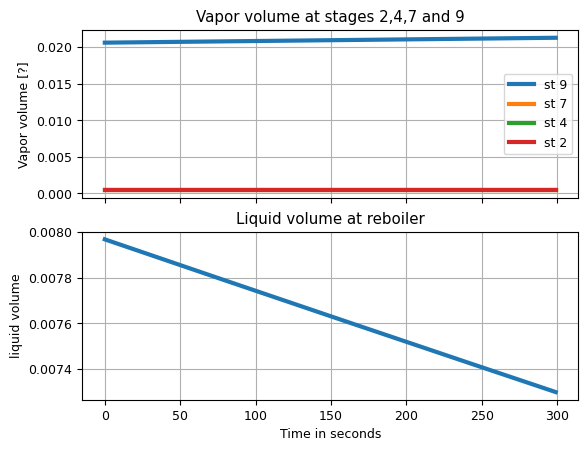

In [20]:
timestep = params_simulator["t_step"]
fig, ax = plt.subplots(2,sharex=True)
ax[0].plot(simulator.data["_time"],
        simulator.data["_z","e0_V_V_st9"],label="st 9")
ax[0].plot(simulator.data["_time"],
        simulator.data["_z","e0_V_V_st7"],label="st 7")
ax[0].plot(simulator.data["_time"],
        simulator.data["_z","e0_V_V_st5"],label="st 4")
ax[0].plot(simulator.data["_time"],
        simulator.data["_z","e0_V_V_st3"],label="st 2")
ax[0].set_ylabel("Vapor volume [?]")
ax[0].legend()
ax[0].set_title("Vapor volume at stages 2,4,7 and 9")

ax[1].plot(simulator.data["_time"],simulator.data["_z","e0_V_L_st9"],label="")
ax[1].set_ylabel("liquid volume")
ax[1].set_xlabel("Time in seconds")
ax[1].set_title("Liquid volume at reboiler")

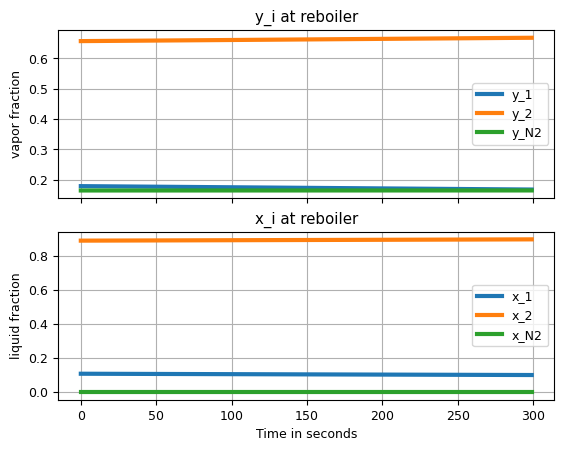

In [21]:
fig, ax1 = plt.subplots(2,sharex=True)
ax1[0].plot(simulator.data["_time"],
            simulator.data["_z","e0_y_st9_i1"],label="y_1")
ax1[0].plot(simulator.data["_time"],
            simulator.data["_z","e0_y_st9_i2"],label="y_2")
ax1[0].plot(simulator.data["_time"],
            simulator.data["_z","e0_y_st9_i3"],label="y_N2")
ax1[0].set_ylabel("vapor fraction")
ax1[0].legend()
ax1[0].set_title("y_i at reboiler")



ax1[1].plot(simulator.data["_time"],
            simulator.data["_z","e0_x_st9_i1"],label="x_1")
ax1[1].plot(simulator.data["_time"],
            simulator.data["_z","e0_x_st9_i2"],label="x_2")
ax1[1].plot(simulator.data["_time"],
            simulator.data["_z","e0_x_st9_i3"],label="x_N2")
ax1[1].set_ylabel("liquid fraction")
ax1[1].set_xlabel("Time in seconds")
ax1[1].set_title("x_i at reboiler")
ax1[1].legend()
plt.show()

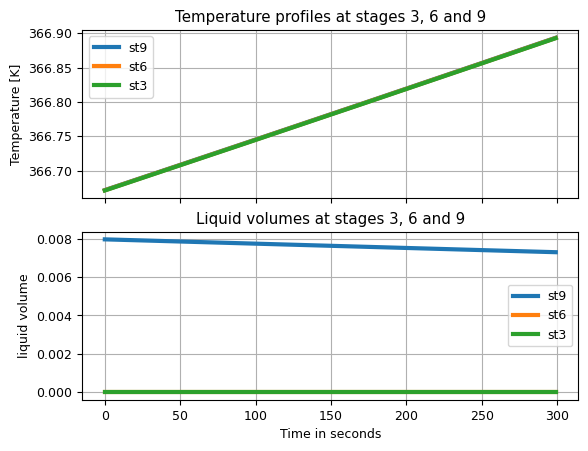

In [22]:
fig, ax1 = plt.subplots(2,sharex=True)
ax1[0].plot(simulator.data["_time"],
            simulator.data["_z","e0_T_st9"],label="st9")
ax1[0].plot(simulator.data["_time"],
            simulator.data["_z","e0_T_st6"],label="st6")
ax1[0].plot(simulator.data["_time"],
            simulator.data["_z","e0_T_st3"],label="st3")
ax1[0].set_ylabel("Temperature [K]")
ax1[0].legend()
ax1[0].set_title("Temperature profiles at stages 3, 6 and 9")



ax1[1].plot(simulator.data["_time"],
            simulator.data["_z","e0_V_L_st9"],label="st9")
ax1[1].plot(simulator.data["_time"],
            simulator.data["_z","e0_V_L_st6"],label="st6")
ax1[1].plot(simulator.data["_time"],
            simulator.data["_z","e0_V_L_st3"],label="st3")
ax1[1].set_ylabel("liquid volume")
ax1[1].set_xlabel("Time in seconds")
ax1[1].legend()
ax1[1].set_title("Liquid volumes at stages 3, 6 and 9")
plt.show()

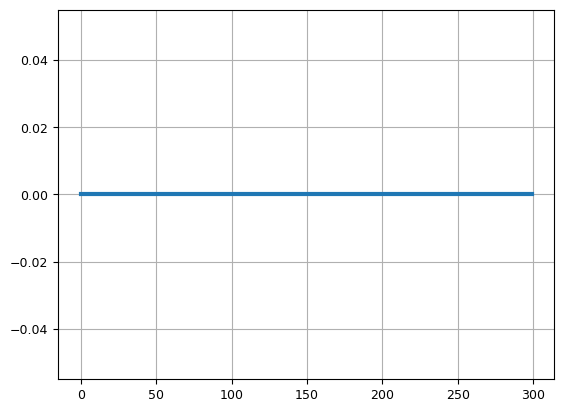

In [23]:
# plt.plot(simulator.data["_time"],simulator.data["_u","e0_F_F_st9"])
plt.plot(simulator.data["_time"],simulator.data["_u","e0_greek_sigma_R"])

In [24]:
def compare_plots(simulator,trajectory,t0,var_dict:dict,index=0):
    i = 100
    
    for var_type, variables in var_dict.items():
        if var_type.lower() == "z":
            spec = "_z"
            color = "b"
        elif var_type.lower() == "u":
            spec = "_u"
            color = "k"
        elif var_type.lower() == "x":
            spec = "_x"
            color = "b"
        
        for var_name in variables:
            i +=1
            plt.figure(num=i)
            plt.plot(simulator.data["_time"]+t0,simulator.data[spec,var_name],"{}o-".format(color),label="model")
            plt.plot(trajectory["Time"],trajectory["Flowsheet."+var_name],"y",label="data")
            plt.legend()
            plt.xlabel("Time in seconds")
            plt.title(var_name)
            
                

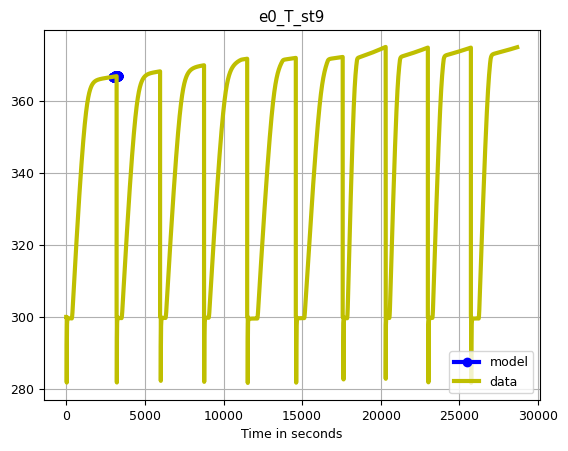

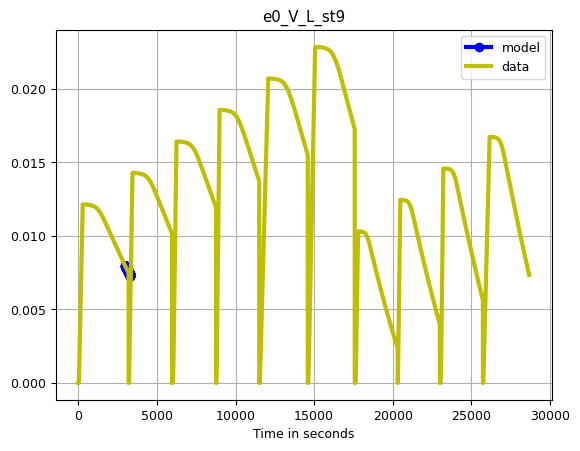

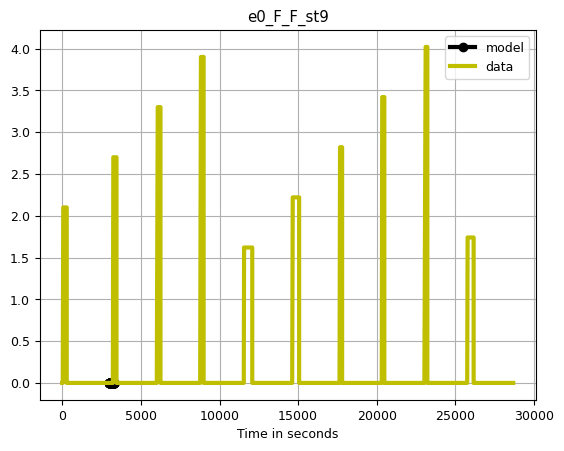

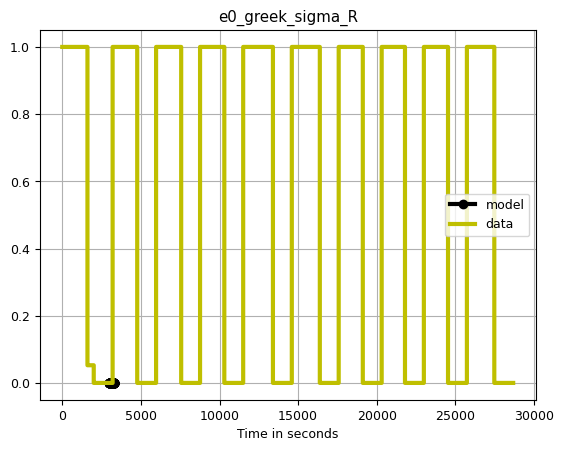

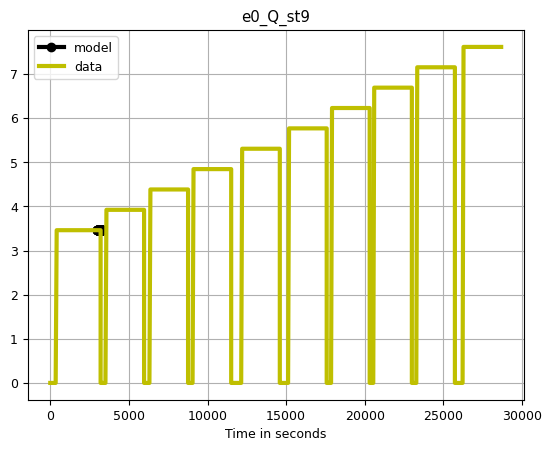

In [25]:
var_dict = {"x":[],"z":["e0_T_st9","e0_V_L_st9"],"u":["e0_F_F_st9","e0_greek_sigma_R","e0_Q_st9"]}
compare_plots(simulator,trajectory,t0,var_dict,index=index0)